In [1]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(0,0.2,num=21)
scales = np.linspace(0,9,num=21)
#alphas = np.linspace(0,0.1,num=21)
#scales = np.linspace(2.5,4.0,num=21)

trainss = []
testss = []

for alpha in alphas:
    trains = []
    tests = []
    for scale in scales:
        #train = np.loadtxt("./arithmetic_landscape_fine/trainbest_alpha_%.3f_scale_%.3f"%(alpha, scale))
        #test = np.loadtxt("./arithmetic_landscape_fine/testbest_alpha_%.3f_scale_%.3f"%(alpha, scale))
        train = np.loadtxt("./arithmetic_landscape/trainbest_alpha_%.2f_scale_%.2f"%(alpha, scale))
        test = np.loadtxt("./arithmetic_landscape/testbest_alpha_%.2f_scale_%.2f"%(alpha, scale))
        trains.append(train)
        tests.append(test)
    trainss.append(trains)
    testss.append(tests)


([<matplotlib.axis.YTick at 0x7f86e8f55be0>,
 [Text(0, 0, '0'), Text(0, 20, '1')])

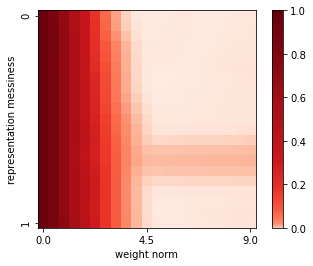

In [2]:
from scipy.ndimage.filters import gaussian_filter
import matplotlib.colors as mcolors

#plt.figure(figsize=(20,10))

class MyNormalize(mcolors.Normalize):
    def __call__(self, value, clip=None):
        # function to normalize any input between vmin and vmax linearly to [0,1]
        n = lambda x: (x-self.vmin)/(self.vmax-self.vmin)
        # nonlinear function between [0,1] and [0,1]
        f = lambda x: x**(1/4)
        return np.ma.masked_array(f(n(value)))
    
norm=  MyNormalize(vmin=0, vmax=1.0)

#plt.imshow((gaussian_filter(np.array(trainss)[:10,6:12], sigma=1)), cmap='Reds', norm=norm)
plt.imshow((gaussian_filter(np.array(trainss)[:,:], sigma=1)), cmap='Reds', norm=norm)


plt.colorbar()
plt.xlabel('weight norm')
plt.ylabel('representation messiness')
plt.xticks([0,10,20],[scales[0], scales[10], scales[20]])
plt.yticks([0,20],[0,1], rotation=90)



/Users/ziming/opt/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


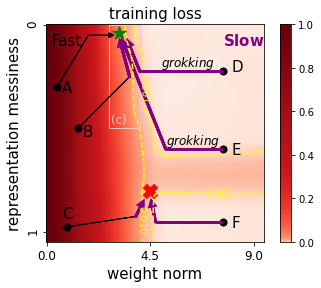

In [3]:
import torch
from matplotlib.patches import Rectangle

class MyNormalize(mcolors.Normalize):
    def __call__(self, value, clip=None):
        # function to normalize any input between vmin and vmax linearly to [0,1]
        n = lambda x: (x-self.vmin)/(self.vmax-self.vmin)
        # nonlinear function between [0,1] and [0,1]
        f = lambda x: x**(1/4)
        return np.ma.masked_array(f(n(value)))
    
norm=  MyNormalize(vmin=0, vmax=1.0)

plot_scale = ps = 10

blur = gaussian_filter(np.array(trainss)[:,:], sigma=1)
large = torch.nn.functional.interpolate(torch.tensor(blur).unsqueeze(dim=0).unsqueeze(dim=0), scale_factor=(plot_scale,plot_scale), mode='bilinear')[0,0].detach().numpy()
plt.imshow(large, cmap='Reds', norm=norm)
plt.colorbar()

plt.scatter(7*ps,0.8*ps,s=200,marker="*",color="green")
plt.scatter(10*ps,16*ps,s=200,marker="X",color="red")

x = np.arange(21*plot_scale)
y = np.arange(21*plot_scale)
X, Y = np.meshgrid(x, y)
#fig, ax = plt.subplots()
CS = plt.gca().contour(X, Y, large, [0.001, 0.01], colors=["yellow","yellow"], linestyles=["dashed", "dashed"])
plt.gca().clabel(CS, inline=True, fontsize=10)
#ax.set_title('Simplest default with labels')

plt.xlabel('weight norm',fontsize=15)
plt.ylabel('representation messiness', fontsize=15)
plt.xticks([0,10*plot_scale,20*plot_scale],[scales[0], scales[10], scales[20]], fontsize=12)
plt.yticks([0,20*plot_scale],[0,1], rotation=90, fontsize=12)

plt.text(0.5*ps,2*ps,"Fast", fontsize=15)
plt.text(17*ps,2*ps,r"${\bf Slow}$", fontsize=15, color="purple")
plt.text(6.2*ps,9.5*ps,"(c)", fontsize=12, color="pink")
plt.title("training loss", fontsize=15)

plt.gca().add_patch(Rectangle((6*ps, 0*ps), 3*ps, 10*ps,edgecolor = 'pink',fill=False))

# A
plt.scatter(1*ps,6*ps,s=50,color="black")
plt.text(1.5*ps,6.5*ps,"A",fontsize=15)
plt.arrow(1*ps,6*ps, 3*ps, -5*ps, head_width=0, head_length=0, color="black")
plt.arrow(4*ps,1*ps, 2*ps, 0*ps, head_width=5, head_length=5, color="black")

# B
plt.scatter(3*ps,10*ps,s=50,color="black")
plt.text(3.5*ps,10.7*ps,"B",fontsize=15)
plt.arrow(3*ps,10*ps, 5*ps, -5*ps, head_width=0, head_length=0, color="black")
plt.arrow(8*ps,5*ps, -0.8*ps, -3*ps, head_width=5, head_length=5, lw=3, color="purple")

# C
plt.scatter(2*ps,19.5*ps,s=50,color="black")
plt.text(1.5*ps,18.7*ps,"C",fontsize=15)
plt.arrow(2*ps,19.5*ps, 6.6*ps, -1*ps, head_width=0, head_length=0, color="black")
plt.arrow(8.6*ps,18.5*ps, 0.5*ps, -1*ps, head_width=5, head_length=5, lw=3, color="purple")

# D
plt.scatter(17*ps,4.5*ps,s=50,color="black")
plt.text(17.8*ps,4.5*ps,"D",fontsize=15)
plt.arrow(17*ps,4.5*ps, -8*ps, 0*ps, head_width=0, head_length=0, lw=3, color="purple")
plt.arrow(9*ps,4.5*ps, -1*ps, -2.5*ps, head_width=5, head_length=5, lw=3, color="purple")

# E
plt.scatter(17*ps,12*ps,s=50,color="black")
plt.text(17.8*ps,12.5*ps,"E",fontsize=15)
plt.arrow(17*ps,12*ps, -5.5*ps, 0*ps, head_width=0, head_length=0, lw=3, color="purple")
plt.arrow(11.5*ps,12*ps, -4*ps, -10*ps, head_width=5, head_length=5, lw=3, color="purple")

# F
plt.scatter(17*ps,19*ps,s=50,color="black")
plt.text(17.8*ps,19.5*ps,"F",fontsize=15)
plt.arrow(17*ps,19*ps, -6.5*ps, 0*ps, head_width=0, head_length=0, lw=3, color="purple")
plt.arrow(10.5*ps,19*ps, -0.3*ps, -1.5*ps, head_width=5, head_length=5, lw=3, color="purple")

plt.text(11*ps,4*ps,r"$grokking$", fontsize=12, color="black")
plt.text(11.5*ps,11.5*ps,r"$grokking$", fontsize=12, color="black")

plt.savefig("./plots/arithmetic_training_landscape.pdf", bbox_inches="tight")

Text(85.0, 120, '$double$\n$descent$')

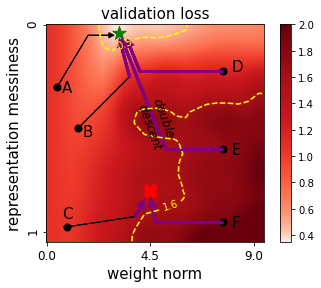

In [6]:
import torch
from matplotlib.patches import Rectangle

class MyNormalize(mcolors.Normalize):
    def __call__(self, value, clip=None):
        # function to normalize any input between vmin and vmax linearly to [0,1]
        n = lambda x: (x-self.vmin)/(self.vmax-self.vmin)
        # nonlinear function between [0,1] and [0,1]
        f = lambda x: x**(1/2)
        return np.ma.masked_array(f(n(value)))
    
norm=  MyNormalize(vmin=0.35, vmax=2)

plot_scale = ps = 10

blur = gaussian_filter(np.array(testss)[:,:], sigma=1)
large = torch.nn.functional.interpolate(torch.tensor(blur).unsqueeze(dim=0).unsqueeze(dim=0), scale_factor=(plot_scale,plot_scale), mode='bilinear')[0,0].detach().numpy()
plt.imshow(large, cmap='Reds', norm=norm)
plt.colorbar()

plt.scatter(7*ps,0.8*ps,s=200,marker="*",color="green")
plt.scatter(10*ps,16*ps,s=200,marker="X",color="red")

x = np.arange(21*plot_scale)
y = np.arange(21*plot_scale)
X, Y = np.meshgrid(x, y)
#fig, ax = plt.subplots()
CS = plt.gca().contour(X, Y, large, [0.5, 1.6], colors=["yellow","yellow"], linestyles=["dashed", "dashed"])
plt.gca().clabel(CS, inline=True, fontsize=10)

plt.xlabel('weight norm',fontsize=15)
plt.ylabel('representation messiness', fontsize=15)
plt.xticks([0,10*plot_scale,20*plot_scale],[scales[0], scales[10], scales[20]], fontsize=12)
plt.yticks([0,20*plot_scale],[0,1], rotation=90, fontsize=12)

plt.title("validation loss", fontsize=15)

# A
plt.scatter(1*ps,6*ps,s=50,color="black")
plt.text(1.5*ps,6.5*ps,"A",fontsize=15)
plt.arrow(1*ps,6*ps, 3*ps, -5*ps, head_width=0, head_length=0, color="black")
plt.arrow(4*ps,1*ps, 2*ps, 0*ps, head_width=5, head_length=5, color="black")

# B
plt.scatter(3*ps,10*ps,s=50,color="black")
plt.text(3.5*ps,10.7*ps,"B",fontsize=15)
plt.arrow(3*ps,10*ps, 5*ps, -5*ps, head_width=0, head_length=0, color="black")
plt.arrow(8*ps,5*ps, -0.8*ps, -3*ps, head_width=5, head_length=5, lw=3, color="purple")

# C
plt.scatter(2*ps,19.5*ps,s=50,color="black")
plt.text(1.5*ps,18.7*ps,"C",fontsize=15)
plt.arrow(2*ps,19.5*ps, 6.6*ps, -1*ps, head_width=0, head_length=0, color="black")
plt.arrow(8.6*ps,18.5*ps, 0.5*ps, -1*ps, head_width=5, head_length=5, lw=3, color="purple")


# D
plt.scatter(17*ps,4.5*ps,s=50,color="black")
plt.text(17.8*ps,4.5*ps,"D",fontsize=15)
plt.arrow(17*ps,4.5*ps, -8*ps, 0*ps, head_width=0, head_length=0, lw=3, color="purple")
plt.arrow(9*ps,4.5*ps, -1*ps, -2.5*ps, head_width=5, head_length=5, lw=3, color="purple")

# E
plt.scatter(17*ps,12*ps,s=50,color="black")
plt.text(17.8*ps,12.5*ps,"E",fontsize=15)
plt.arrow(17*ps,12*ps, -5.5*ps, 0*ps, head_width=0, head_length=0, lw=3, color="purple")
plt.arrow(11.5*ps,12*ps, -4*ps, -10*ps, head_width=5, head_length=5, lw=3, color="purple")

# F
plt.scatter(17*ps,19*ps,s=50,color="black")
plt.text(17.8*ps,19.5*ps,"F",fontsize=15)
plt.arrow(17*ps,19*ps, -6.5*ps, 0*ps, head_width=0, head_length=0, lw=3, color="purple")
plt.arrow(10.5*ps,19*ps, -0.3*ps, -1.5*ps, head_width=5, head_length=5, lw=3, color="purple")

plt.text(8.5*ps,12*ps,r"$double$"+"\n"+r"$descent$", fontsize=12, rotation=-70)

#plt.savefig("./plots/arithmetic_validation_landscape.pdf", bbox_inches="tight")